# Health Insurance Claim Predictor

---

## Introduction

### Project Overview
This project aims to identify the health insurance claims of customers based on various features. The analysis is crucial for decreasing the risk fraudulent claims and increasing overall business profitability by optimizing insurance premium.

### Background
The dataset used in this project is a collection of customer and their health information along with their insurance claim. This dataset provides insights into various factors that might influence insurance claim, including healthiness of the customer, their geographic location, and their wealthiness.

### Objectives
- To segment customer profiles.
- To identify what factors greatly impact the insurance claim.
- To predict the insurance claim of customers based on various features.

### Data Description
#### Dataset Overview
The dataset used in this project is sourced from Kaggle's health insurance dataset. It includes 15000 customer records and 13 features.
#### Key Features
- age : Age of the policyholder
- sex: Gender of policyholder
- weight: Weight of the policyholder in kg
- bmi: Body mass index of the policyholder
- hereditary_diseases: A policyholder has a hereditary diseases or not (no-disease=0; disease=1)
- no_of_dependents: Number of dependent persons of the policyholder
- smoker: Indicates policyholder is a smoker or not (non-smoker=0;smoker=1)
- bloodpressure: Blood pressure reading of policyholder
- diabetes: Indicates whether policyholder has diabetes or not (non-diabetic=0; diabetic=1)
- regular_ex: A policyholder regularly exercises or not (no-exercise=0; exercise=1)
- job_title: Job title of the policyholder
- city: The city in which the policyholder resides
- claim: The amount claimed by the policyholder 
#### Data Types
- Categorical: sex, hereditary_diseases, smoker, diabetes, regular_ex, job_title, city
- Numerical: age, weight, bmi, no_of_dependents, bloodpressure, claim

### Prediction
The goal is to predict the insurance claim of customers based on various features.

### Metrics
RMSE: The square root of the average of the squared differences between predicted and actual values.

$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$

It provides a measure of how well the model's predictions match the actual values. Lower values indicate better accuracy.

### References
1. Dataset Source: [Kaggle Health Insurance Dataset](https://www.kaggle.com/datasets/sureshgupta/health-insurance-data-set/data)

---

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [4]:
data.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [5]:
# imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# impute age and bmi
imputer = imputer.fit(data[['age', 'bmi']])
data[['age', 'bmi']] = imputer.transform(data[['age', 'bmi']])

In [6]:
# winsorizer
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['bloodpressure', 'claim'])

data[['bloodpressure', 'claim']] = winsorizer.fit_transform(data[['bloodpressure', 'claim']])

In [7]:
data.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,70.600800,0.777000,0.224133,12543.004248
std,13.829705,13.701935,5.924606,1.228469,0.398606,13.103514,0.416272,0.417024,10073.193516
min,18.000000,34.000000,16.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.800000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,51.000000,76.000000,34.100000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,104.000000,1.000000,1.000000,34027.462500


In [8]:
import sweetviz as sv

/home/hpark/Syncthing/Professional/DS_Projects/Health_Insurance_Claim/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



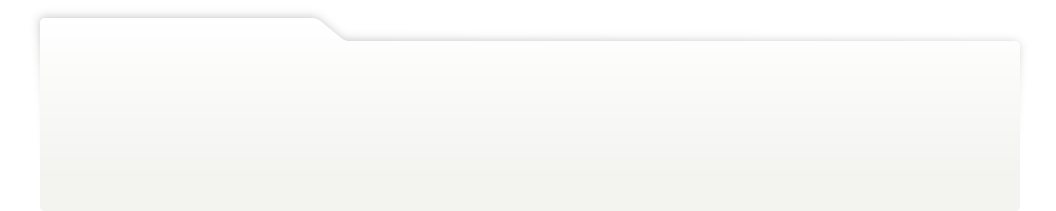
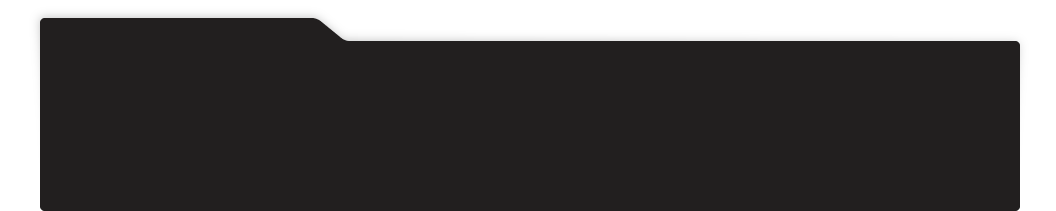
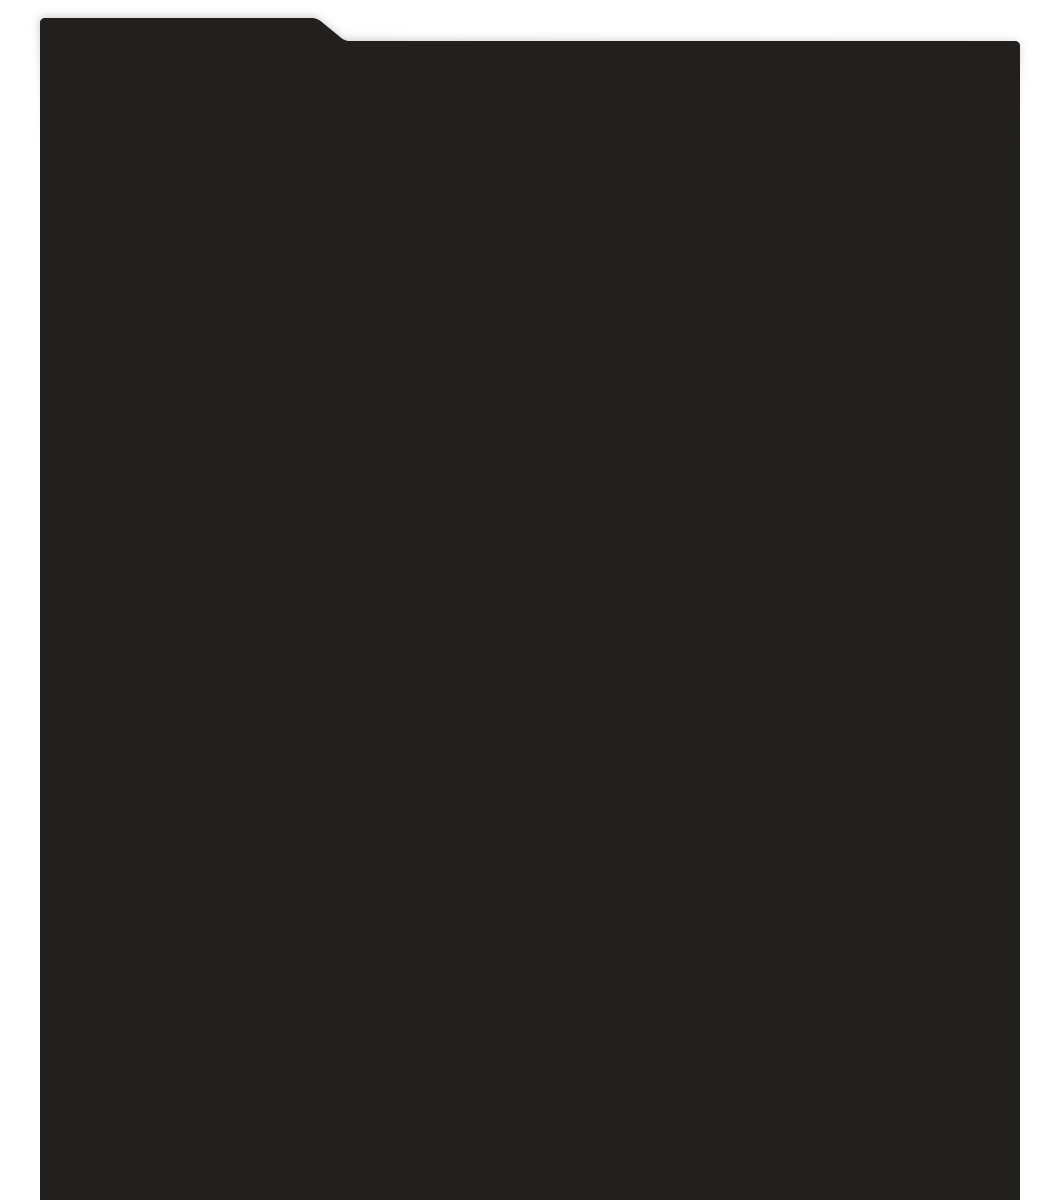
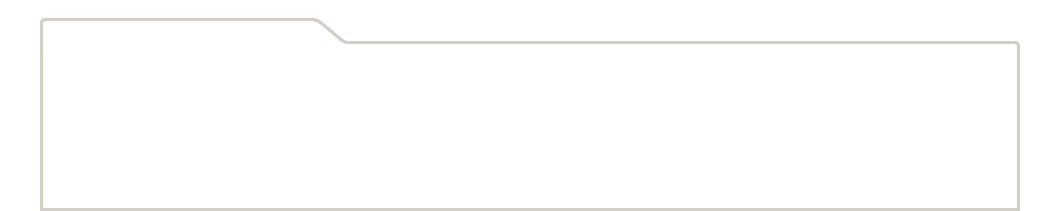
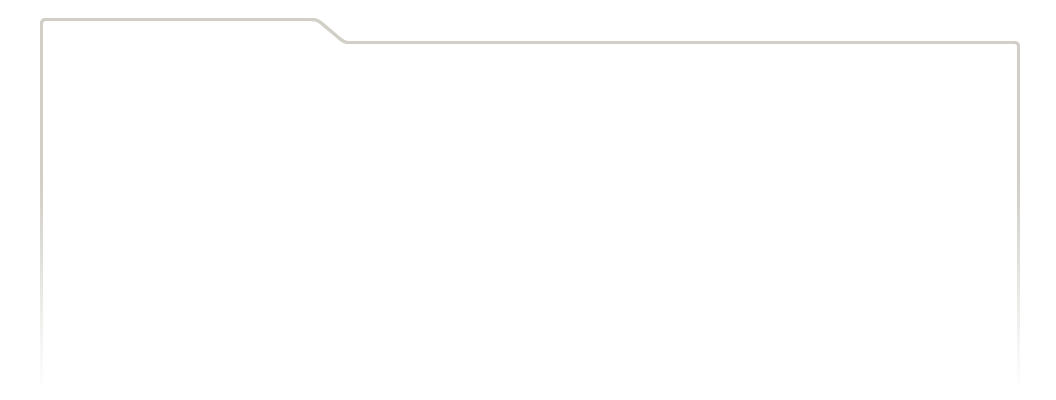
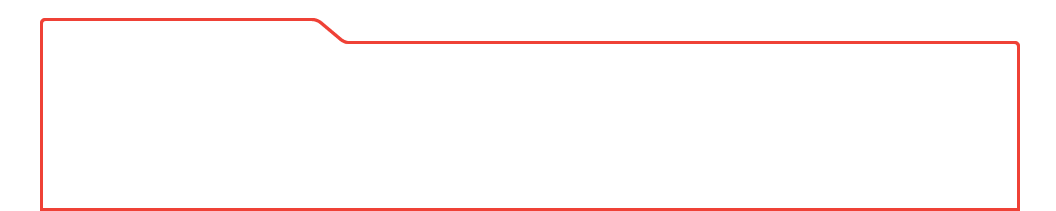
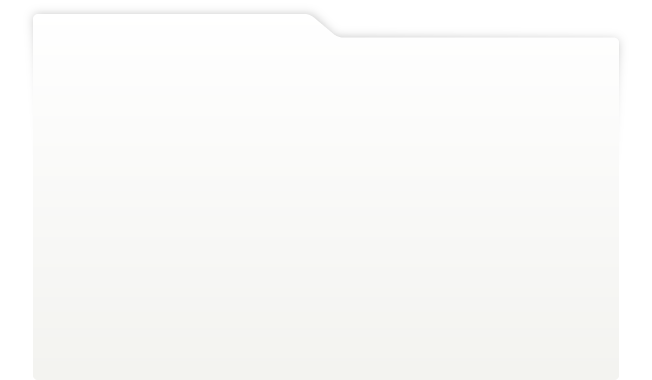
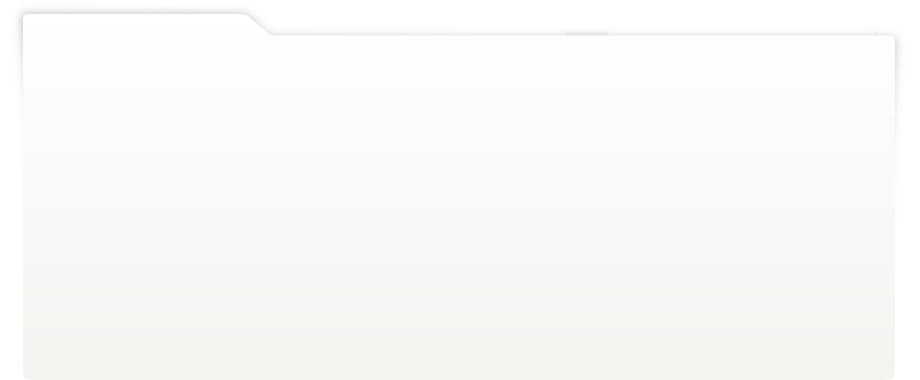
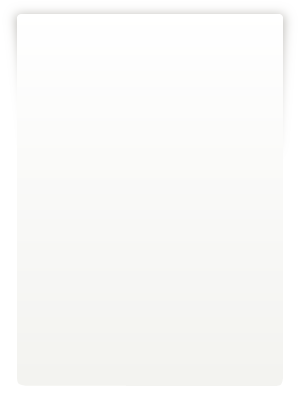
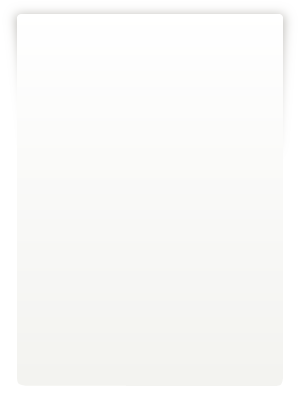
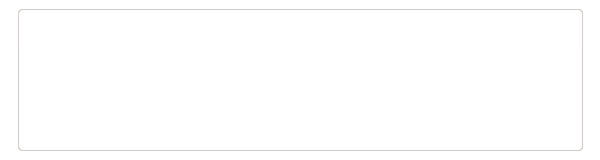
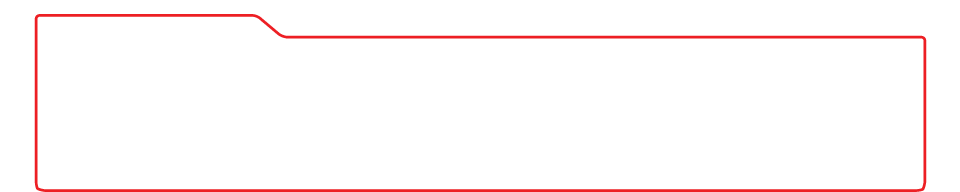
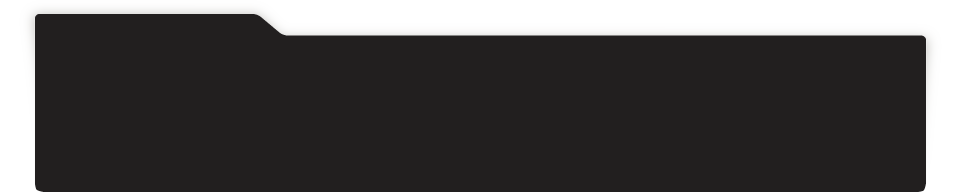
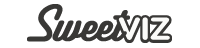
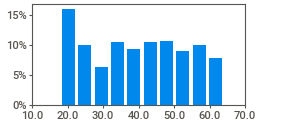
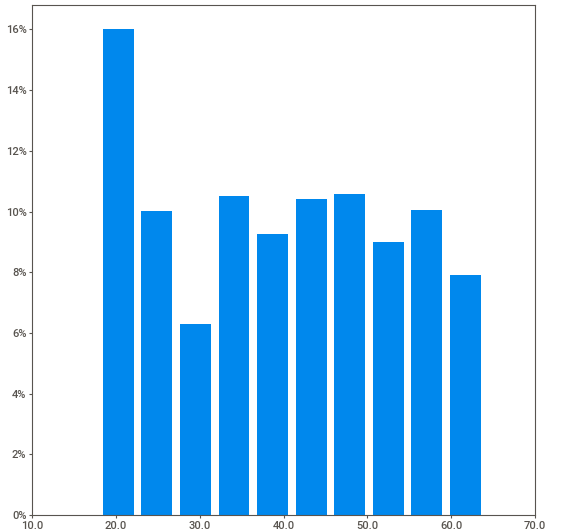
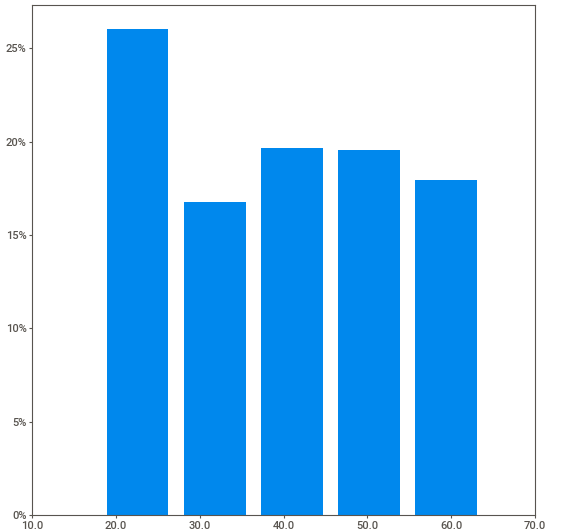
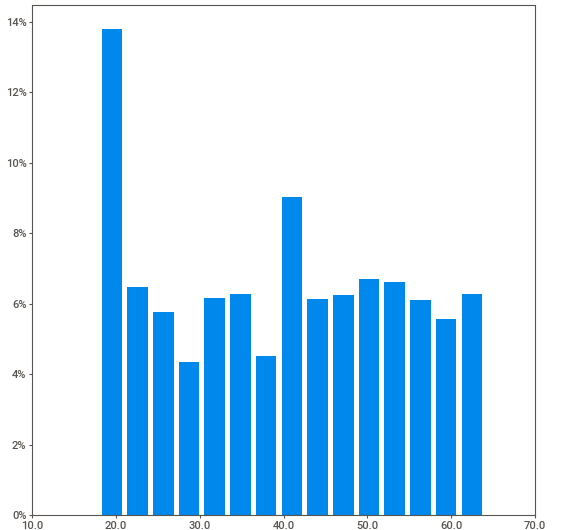
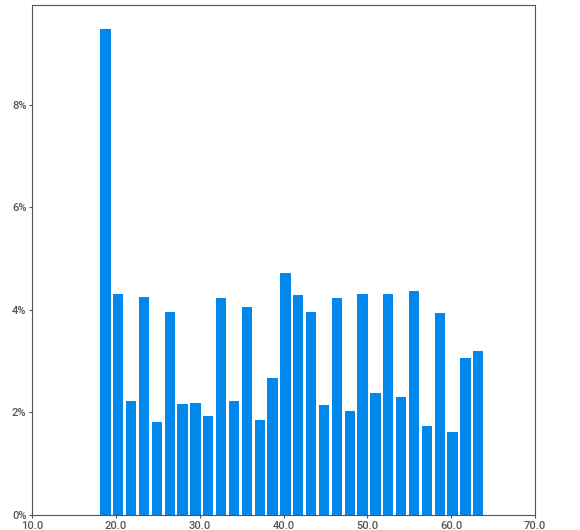
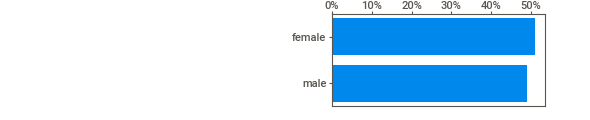
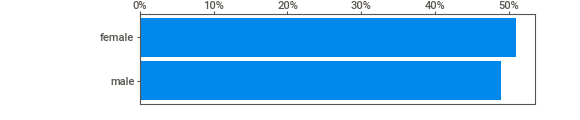
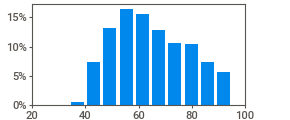
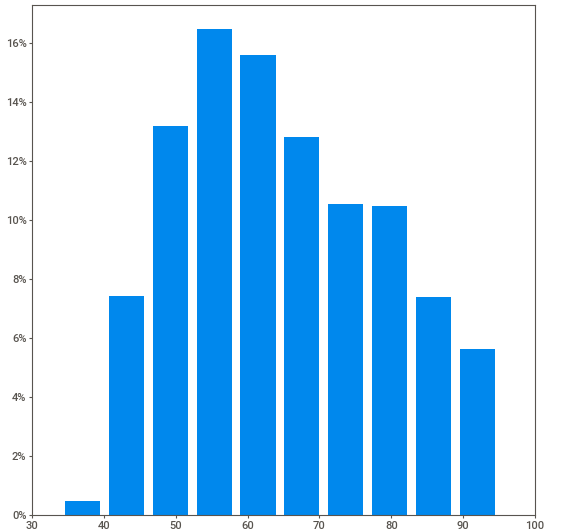
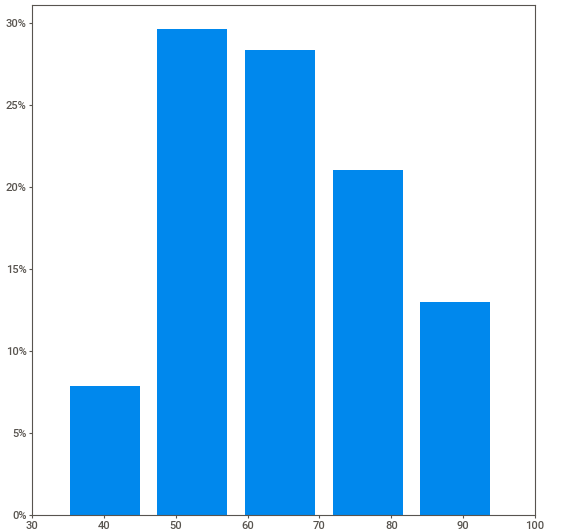
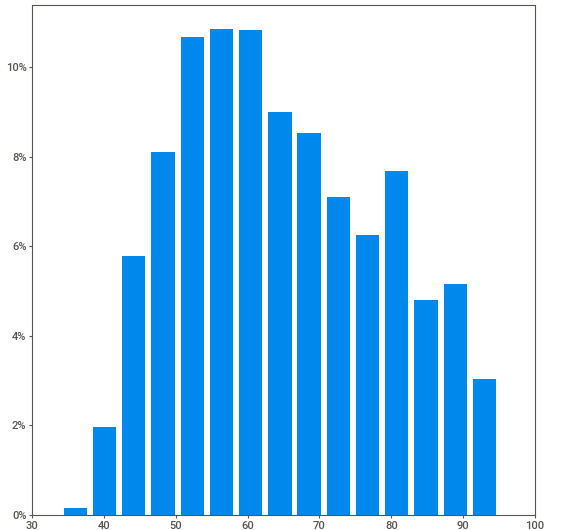
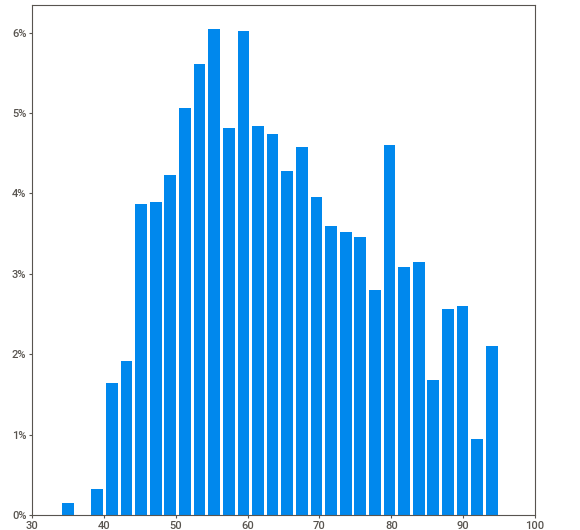
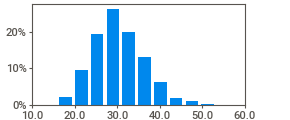
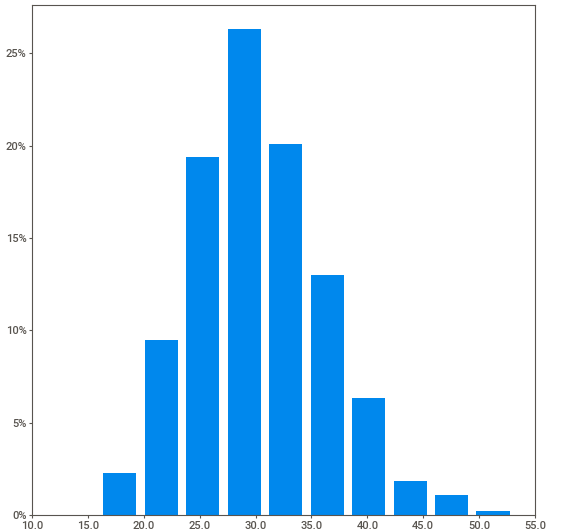
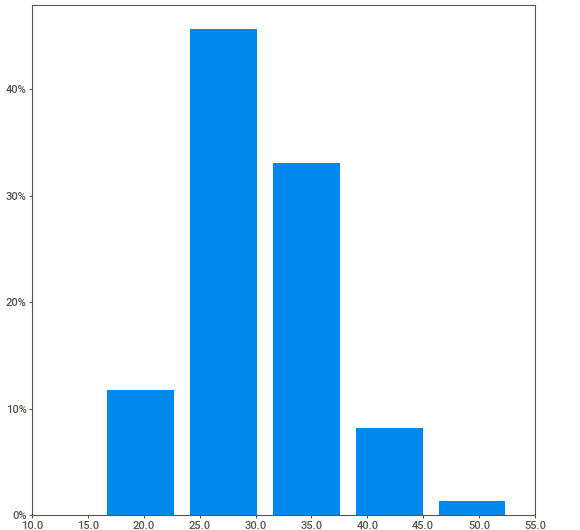
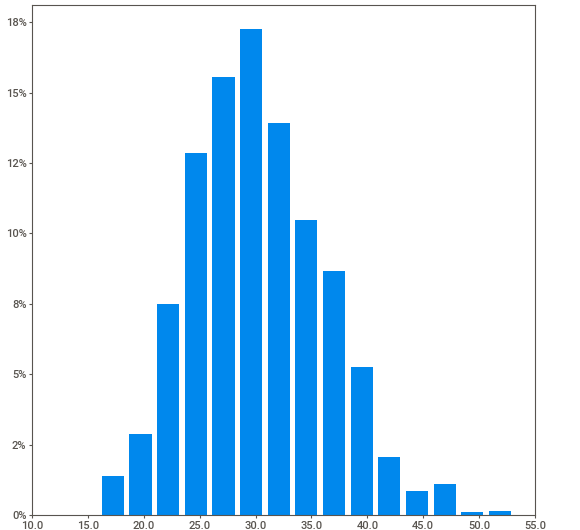
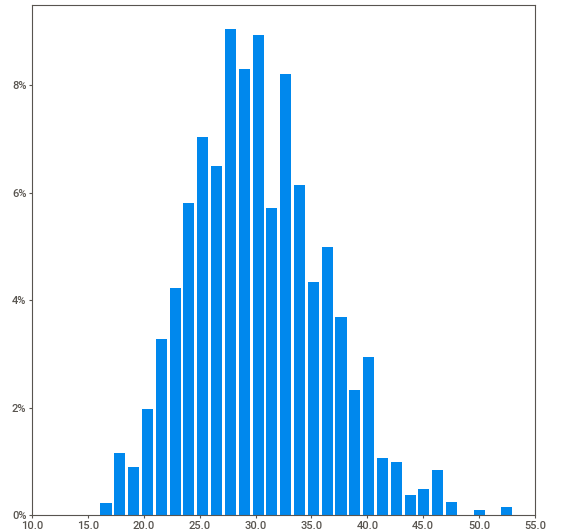
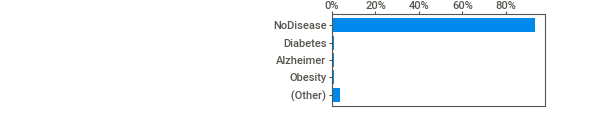
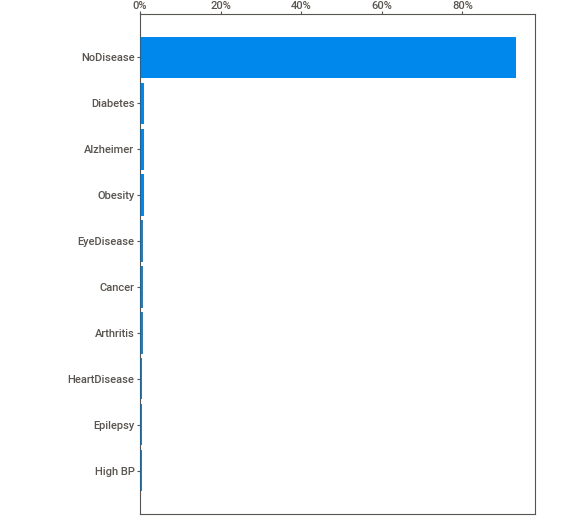
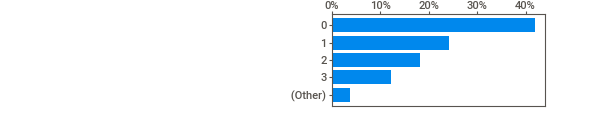
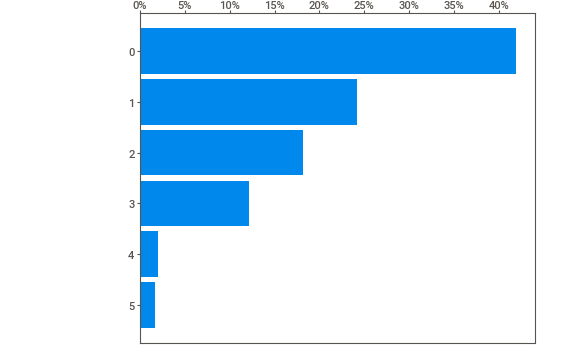
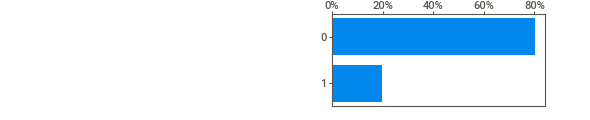
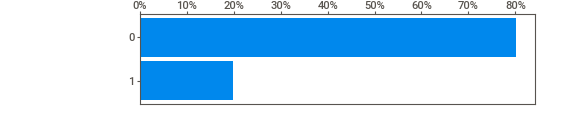
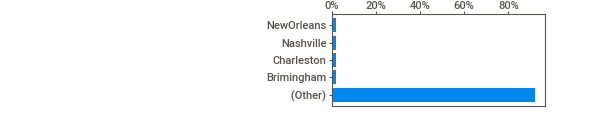
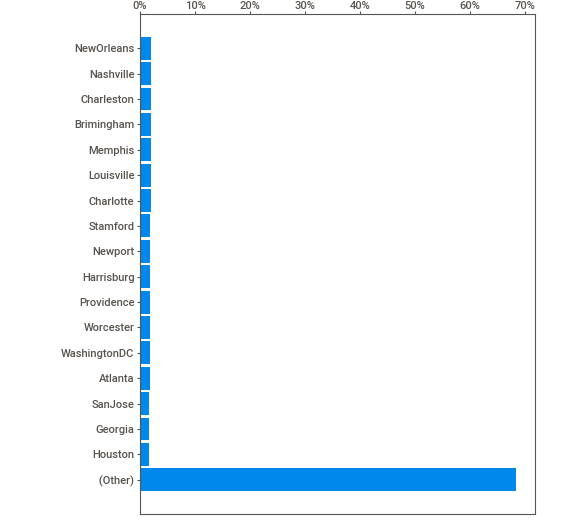
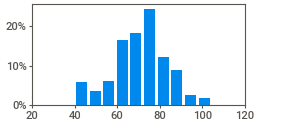
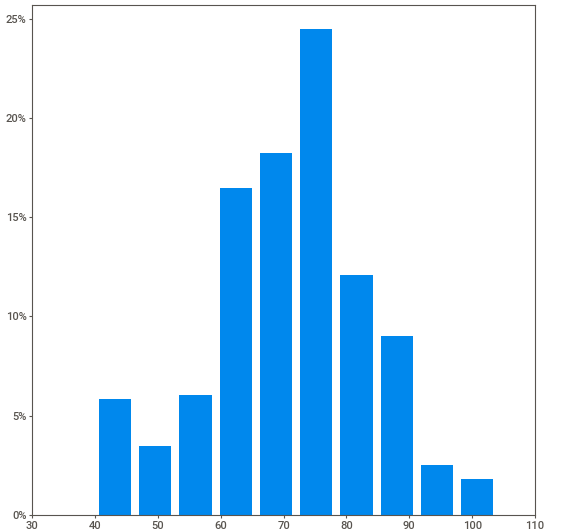
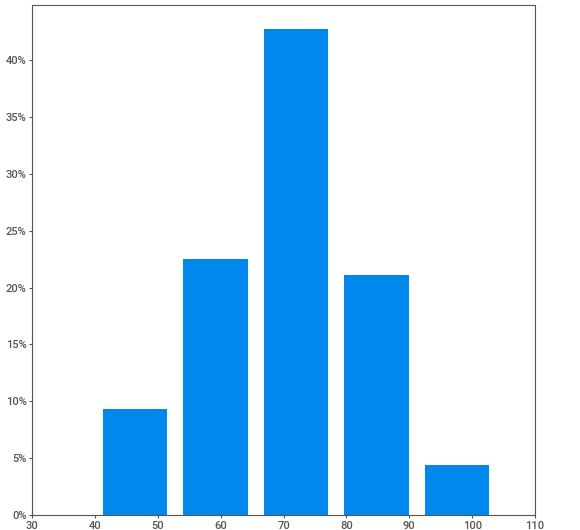
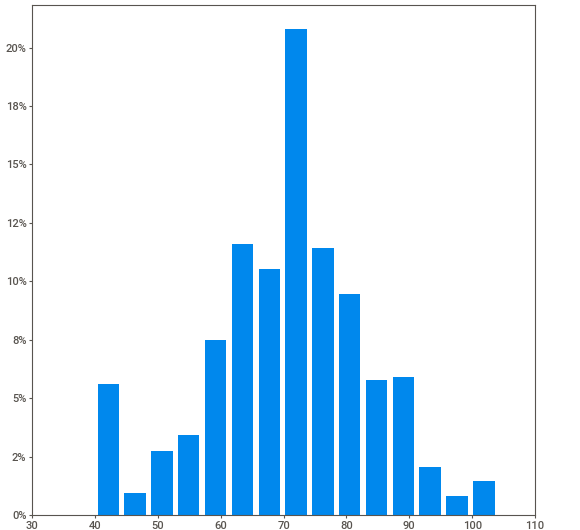
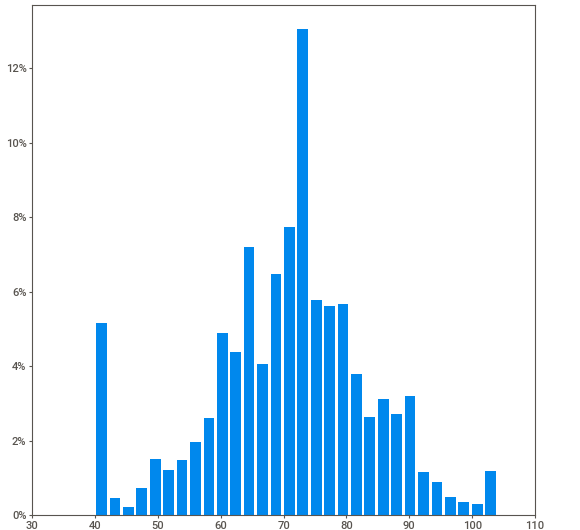
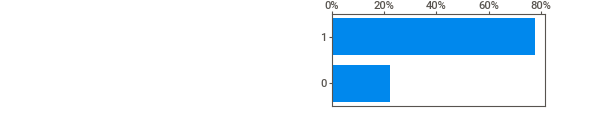
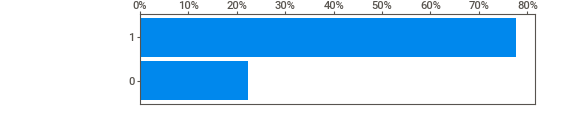
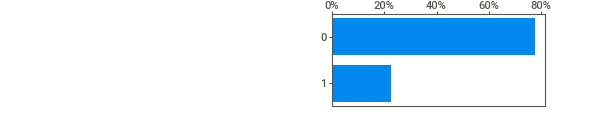
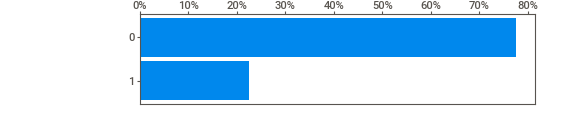
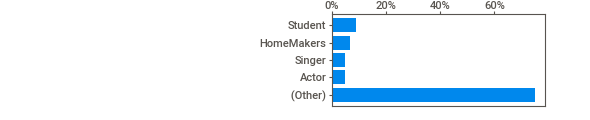
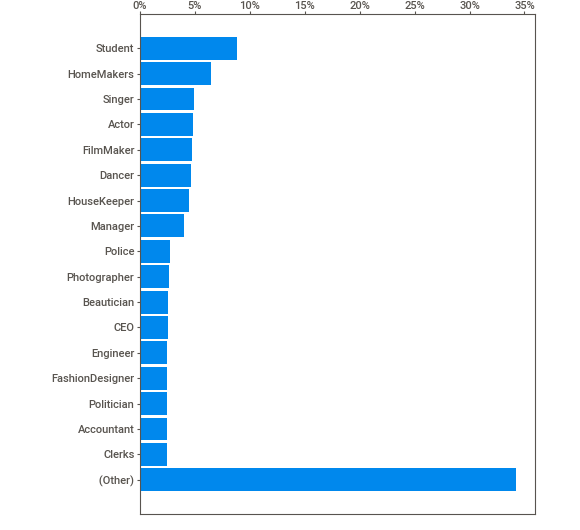
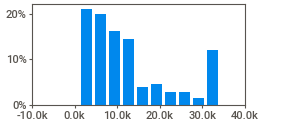
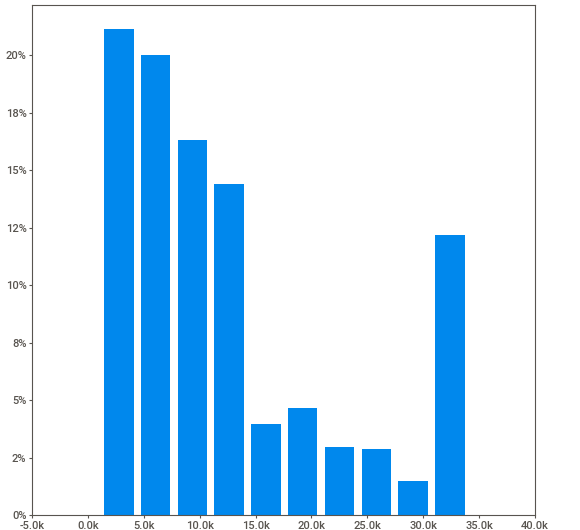
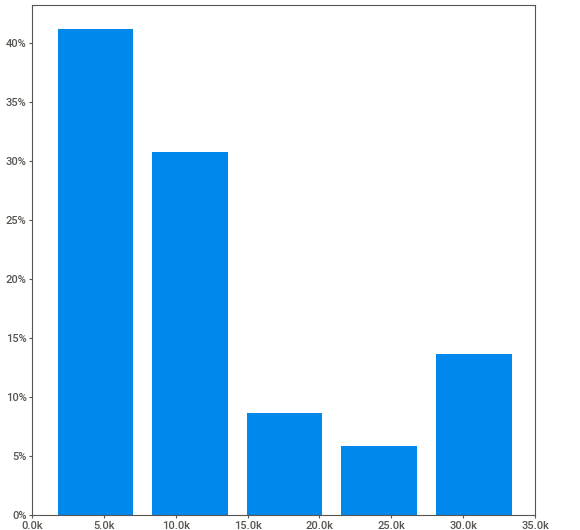
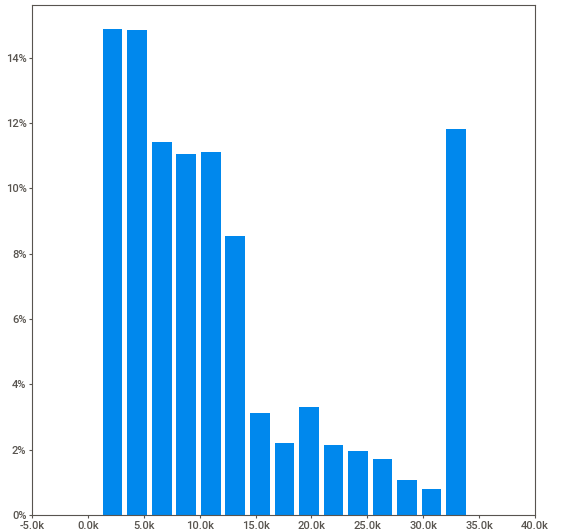
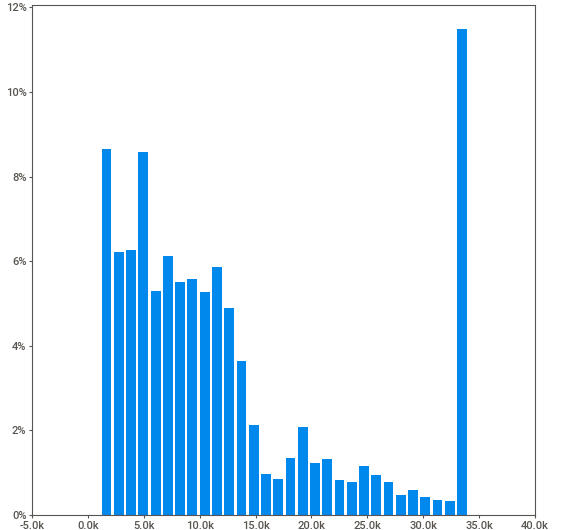
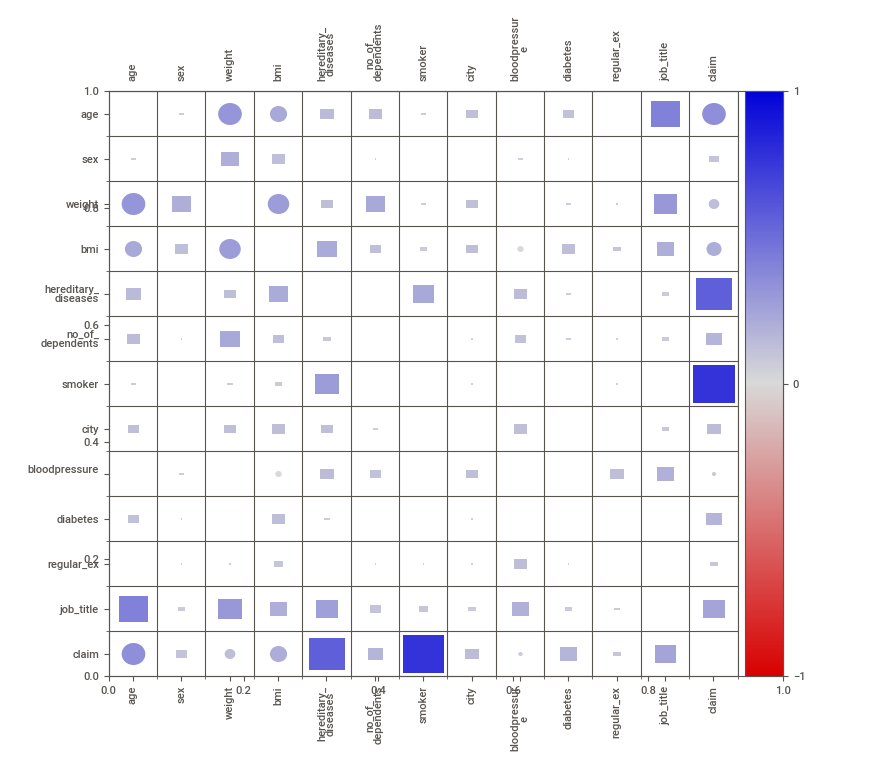
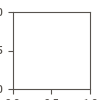

In [9]:
report = sv.analyze(data)

report.show_notebook()

In [10]:
numerical_columns = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'claim']
categorical_columns = ['sex', 'hereditary_diseases', 'city', 'job_title']

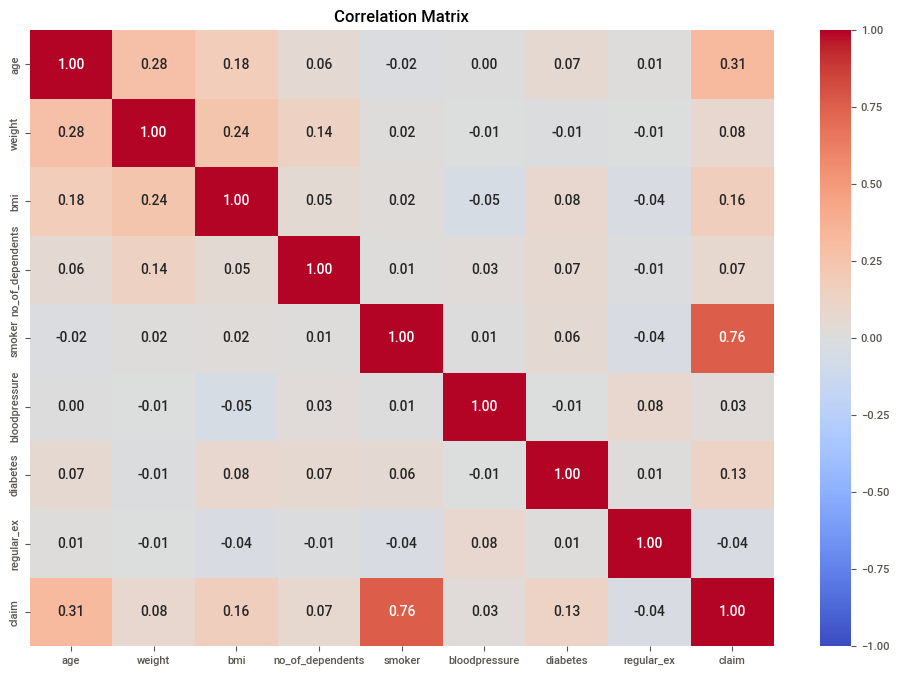

In [11]:
# Compute the correlation matrix
corr_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

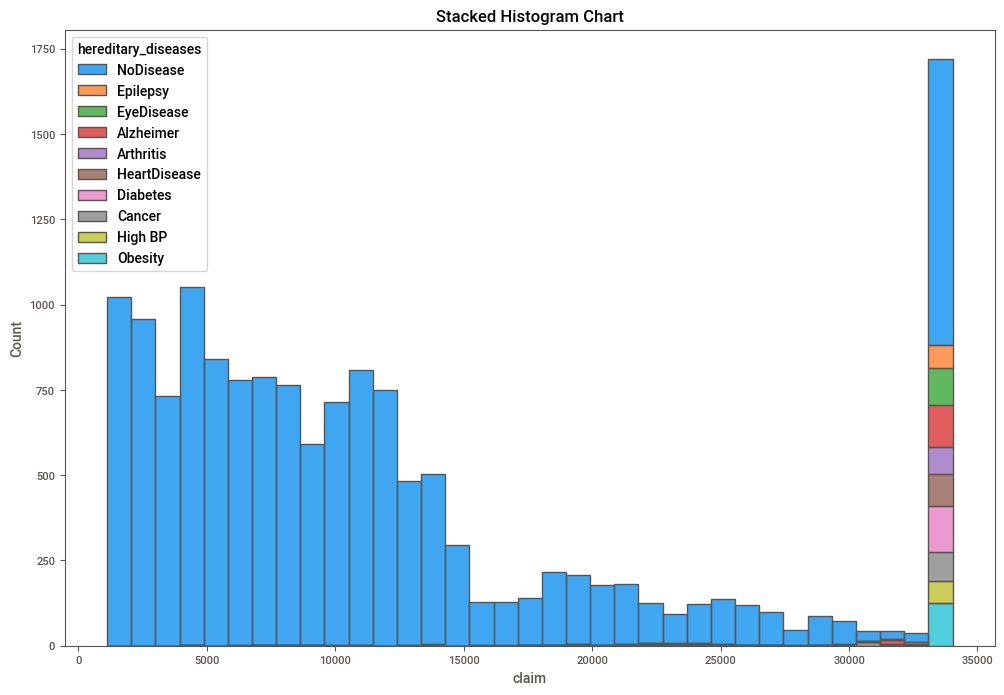

In [14]:
# stacked histogram chart
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='claim', hue='sex', multiple='stack')
plt.title('Stacked Histogram Chart')
plt.show()

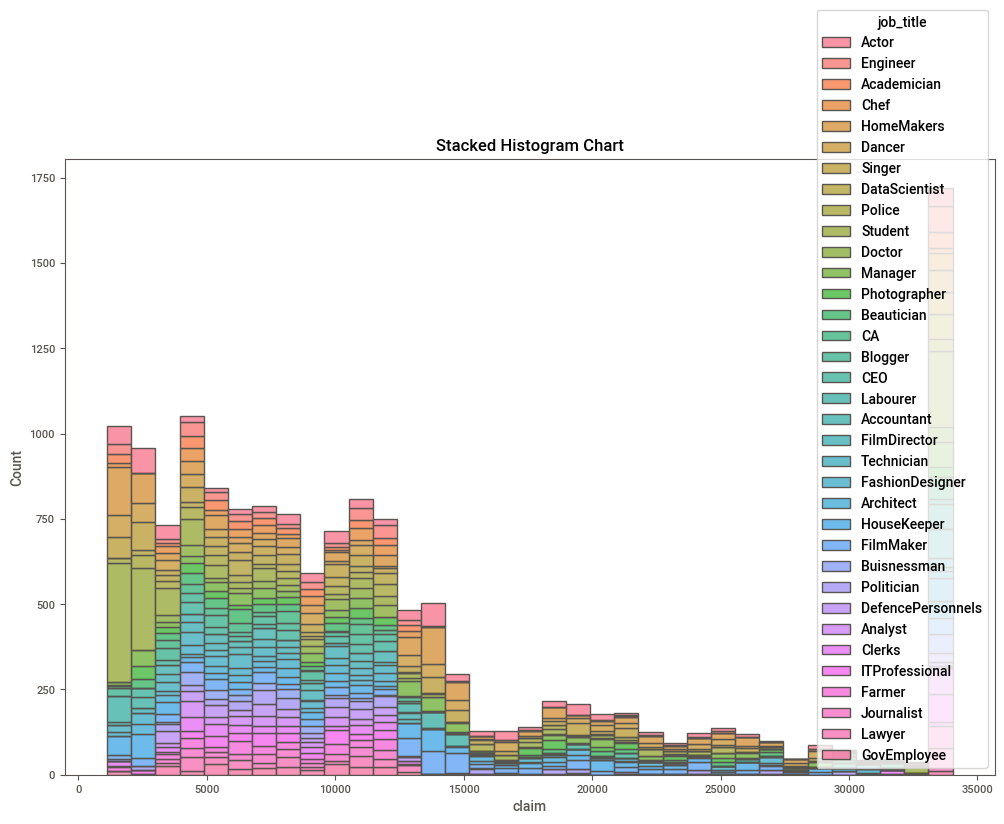

In [13]:
# stacked histogram chart
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='claim', hue='job_title', multiple='stack')
plt.title('Stacked Histogram Chart')
plt.show()

---